---

# Movie Ratings Analysis

### With Python, Using MatPlotLib & Seaborn

The purpose of this project is to demonstrate the multiple ways that Python can visualize and analyze data, using a real dataset of movie reviews from both critics and audience members.

The phases of this project are as follows:
- Import Libraries
- Import Dataset
- Clean Dataset
- Visualize the Data

Visualizations include:
- Joint Plots
- Histograms 
- KDE Plots 
- Box & Violin Plots 
- Facet Grid 
- Dashboarding


---

### 1. Import Libraries

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### 2. Import Dataset

In [7]:
df = pd.read_csv('C:\\Users\\Public\\datasets_public\\misc_data\\MovieRatingsP.csv')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [12]:
len(df) #returned 559

559

In [13]:
df.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [14]:
#check column names
df.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [15]:
#rename the columns to be easier to read and work with
df.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions',
             'Year']

In [16]:
df.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Film            559 non-null    object
 1   Genre           559 non-null    object
 2   CriticRating    559 non-null    int64 
 3   AudienceRating  559 non-null    int64 
 4   BudgetMillions  559 non-null    int64 
 5   Year            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [18]:
df.describe()

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


### 3. Clean Data

We need to change some data types to 'category' for more accurate analysis

In [30]:
df.Film = df.Film.astype('category')
df.Genre = df.Genre.astype('category')
df.Year = df.Year.astype('category')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


Python knows that it shouldn't run calculations on categories in the same way that it would an integer. So this will make our df.describe() make more sense:

In [32]:
df.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


We'll add some code to ignore trivial warnings that are due to deprecated code:

In [24]:
import warnings
warnings.filterwarnings('ignore')

### 4. Visualize Data

#### Joint Plots

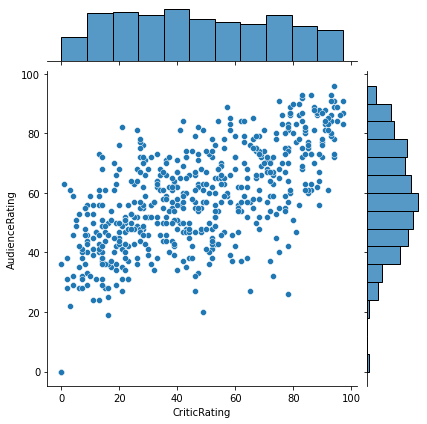

In [26]:
j = sns.jointplot(data=df, x='CriticRating', y='AudienceRating')

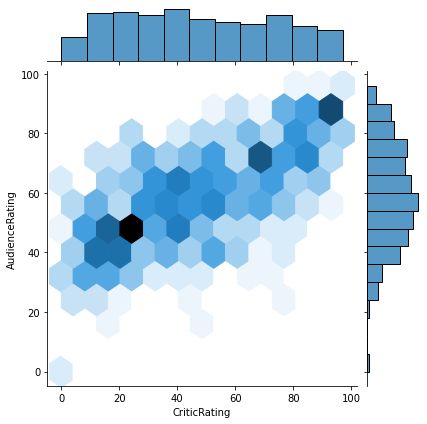

In [27]:
j = sns.jointplot(data=df, x='CriticRating', y='AudienceRating', kind='hex' )


---

#### Exploration using Histograms

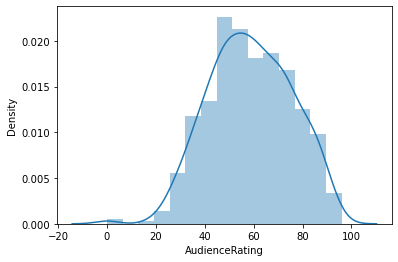

In [17]:
# Audience Rating
m1 = sns.distplot(df.AudienceRating, bins=15)

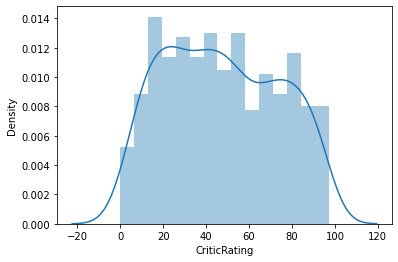

In [18]:
Critic Rating
m2 = sns.distplot(df.CriticRating, bins=15, )

<AxesSubplot:xlabel='CriticRating', ylabel='Density'>

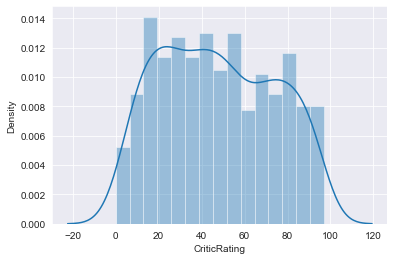

In [19]:
sns.set_style('darkgrid')
sns.distplot(df.CriticRating, bins=15)

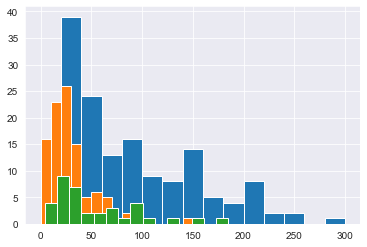

In [24]:
plt.hist(df[df.Genre == 'Action'].BudgetMillions, bins=15)
plt.hist(df[df.Genre == 'Drama'].BudgetMillions, bins=15)
plt.hist(df[df.Genre == 'Thriller'].BudgetMillions, bins=15)

plt.show()

In [25]:
for gen in df.Genre.cat.categories:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


In [27]:
plt.rcParams['figure.figsize'] = 8,4

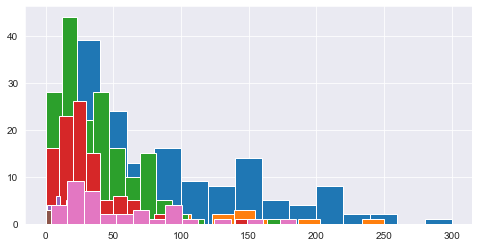

In [28]:
for gen in df.Genre.cat.categories:
    plt.hist(df[df.Genre == gen].BudgetMillions, bins=15)

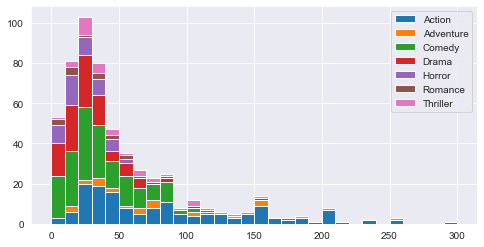

In [33]:
list1 = list()
mylabels = list()
for gen in df.Genre.cat.categories:
    list1.append(df[df.Genre == gen].BudgetMillions)
    mylabels.append(gen)
    
h = plt.hist(list1, bins=30, stacked=True, rwidth=1, label = mylabels)
plt.legend()
plt.show()

---

#### KDE Plot

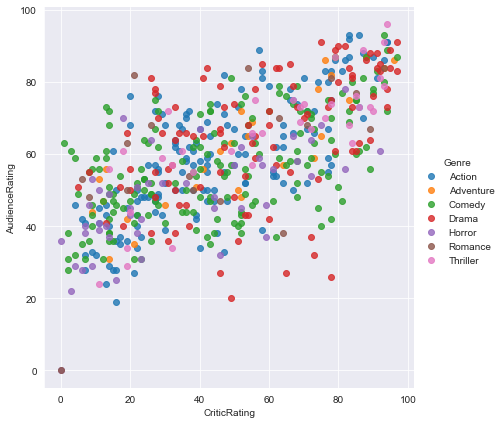

In [49]:
vis1 = sns.lmplot(data=df, x='CriticRating', y='AudienceRating', 
                 fit_reg=False, hue='Genre', size=6, aspect=1)

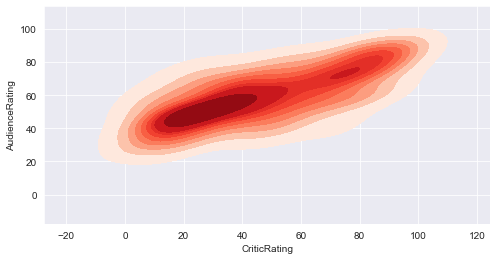

In [45]:
k1 = sns.kdeplot(df.CriticRating, df.AudienceRating, shade = True,
                cmap='Reds')

---

In [87]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

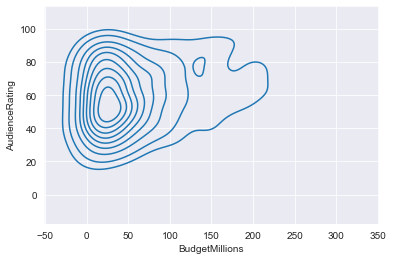

In [48]:

k2 = sns.kdeplot(df.BudgetMillions, df.AudienceRating)

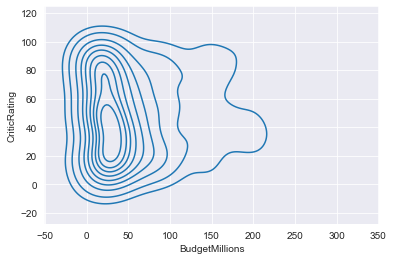

In [50]:
k3 = sns.kdeplot(df.BudgetMillions, df.CriticRating)

[(-50.0, 250.0)]

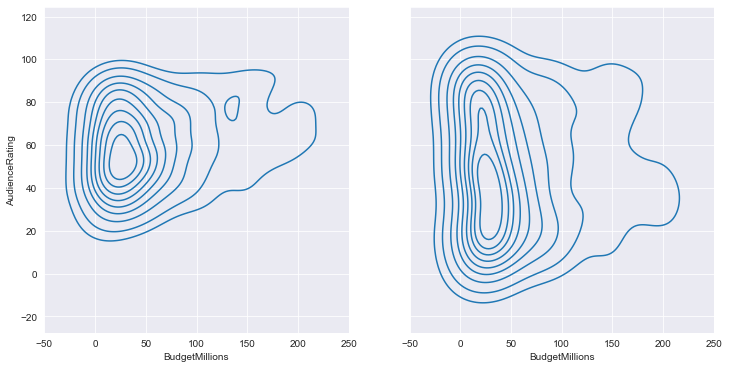

In [60]:
f, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
k2 = sns.kdeplot(df.BudgetMillions, df.AudienceRating, ax=ax[0])
k3 = sns.kdeplot(df.BudgetMillions, df.CriticRating, ax=ax[1])
k2.set(xlim=(-50,250))


In [56]:
ax

array([<AxesSubplot:xlabel='BudgetMillions', ylabel='AudienceRating'>,
       <AxesSubplot:xlabel='BudgetMillions', ylabel='CriticRating'>],
      dtype=object)

---

#### Box Plot & Violin Plot

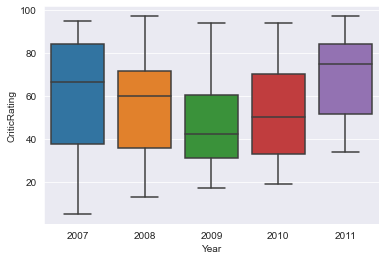

In [64]:
w = sns.boxplot(data=df[df.Genre == 'Drama'], x='Year', y='CriticRating')

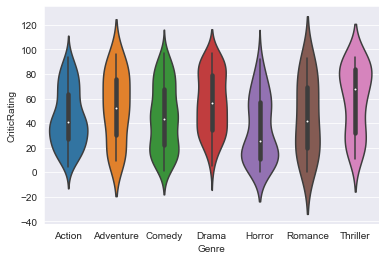

In [62]:
z = sns.violinplot(data=df, x='Genre', y='CriticRating')

---

### Facet Grid

##### Genre & Year, show Critic & Audience Rating

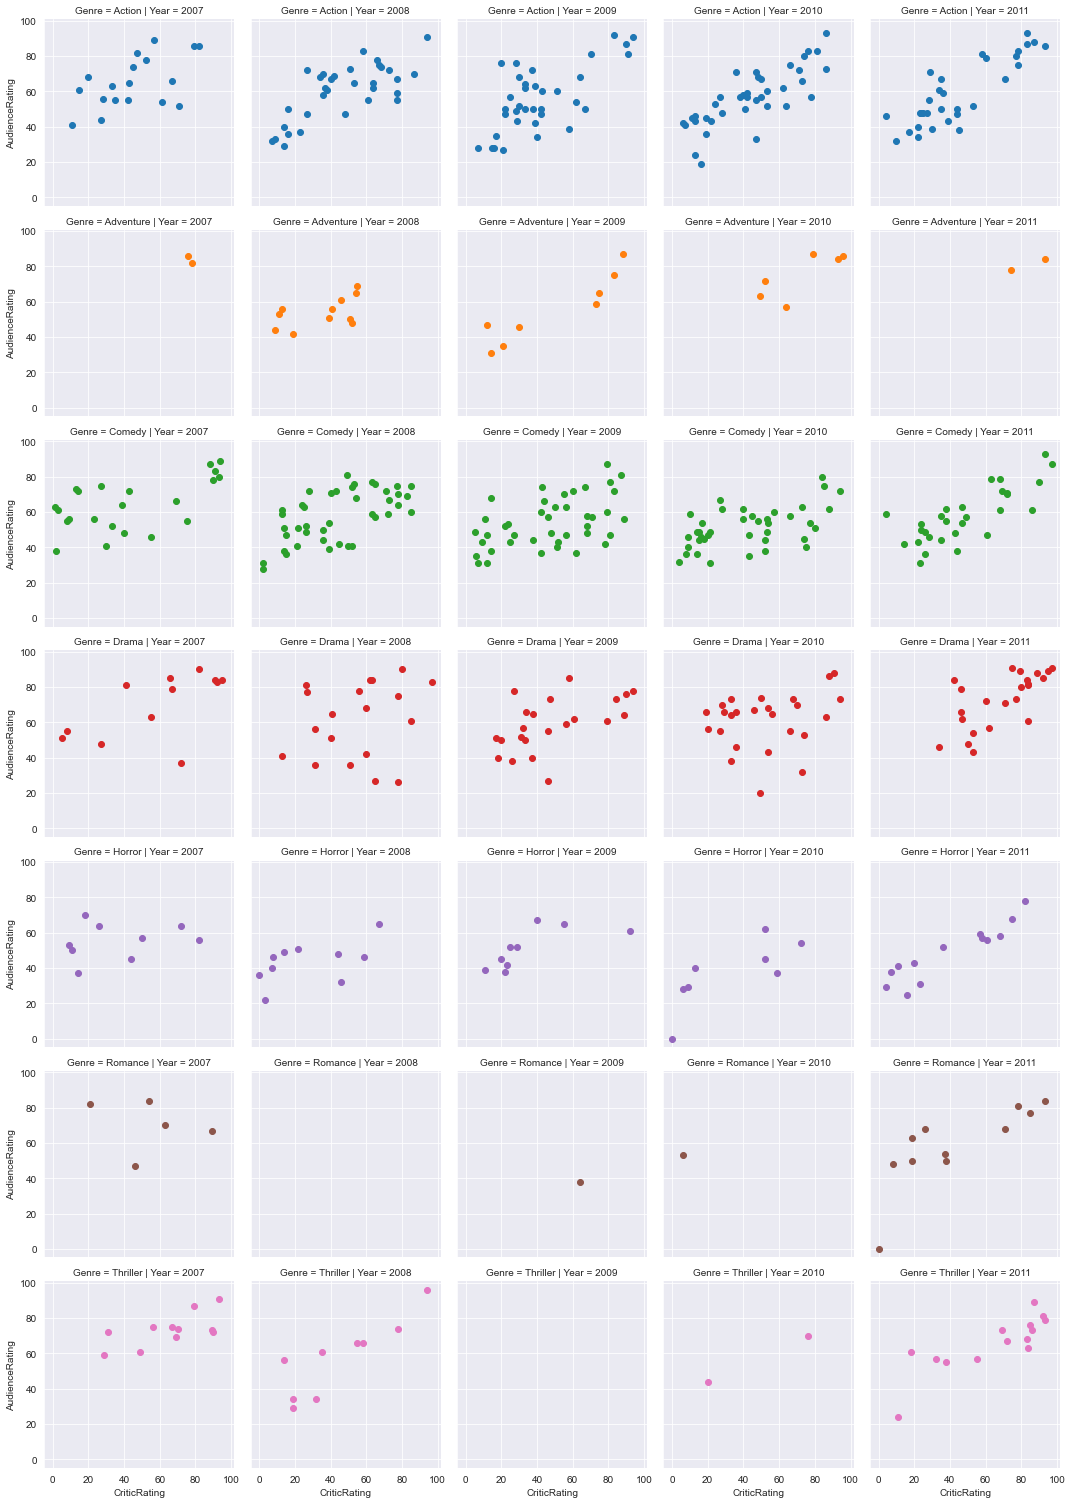

In [70]:
g = sns.FacetGrid(df, row='Genre', col='Year', hue='Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')

##### Genre & Year, Show Budget

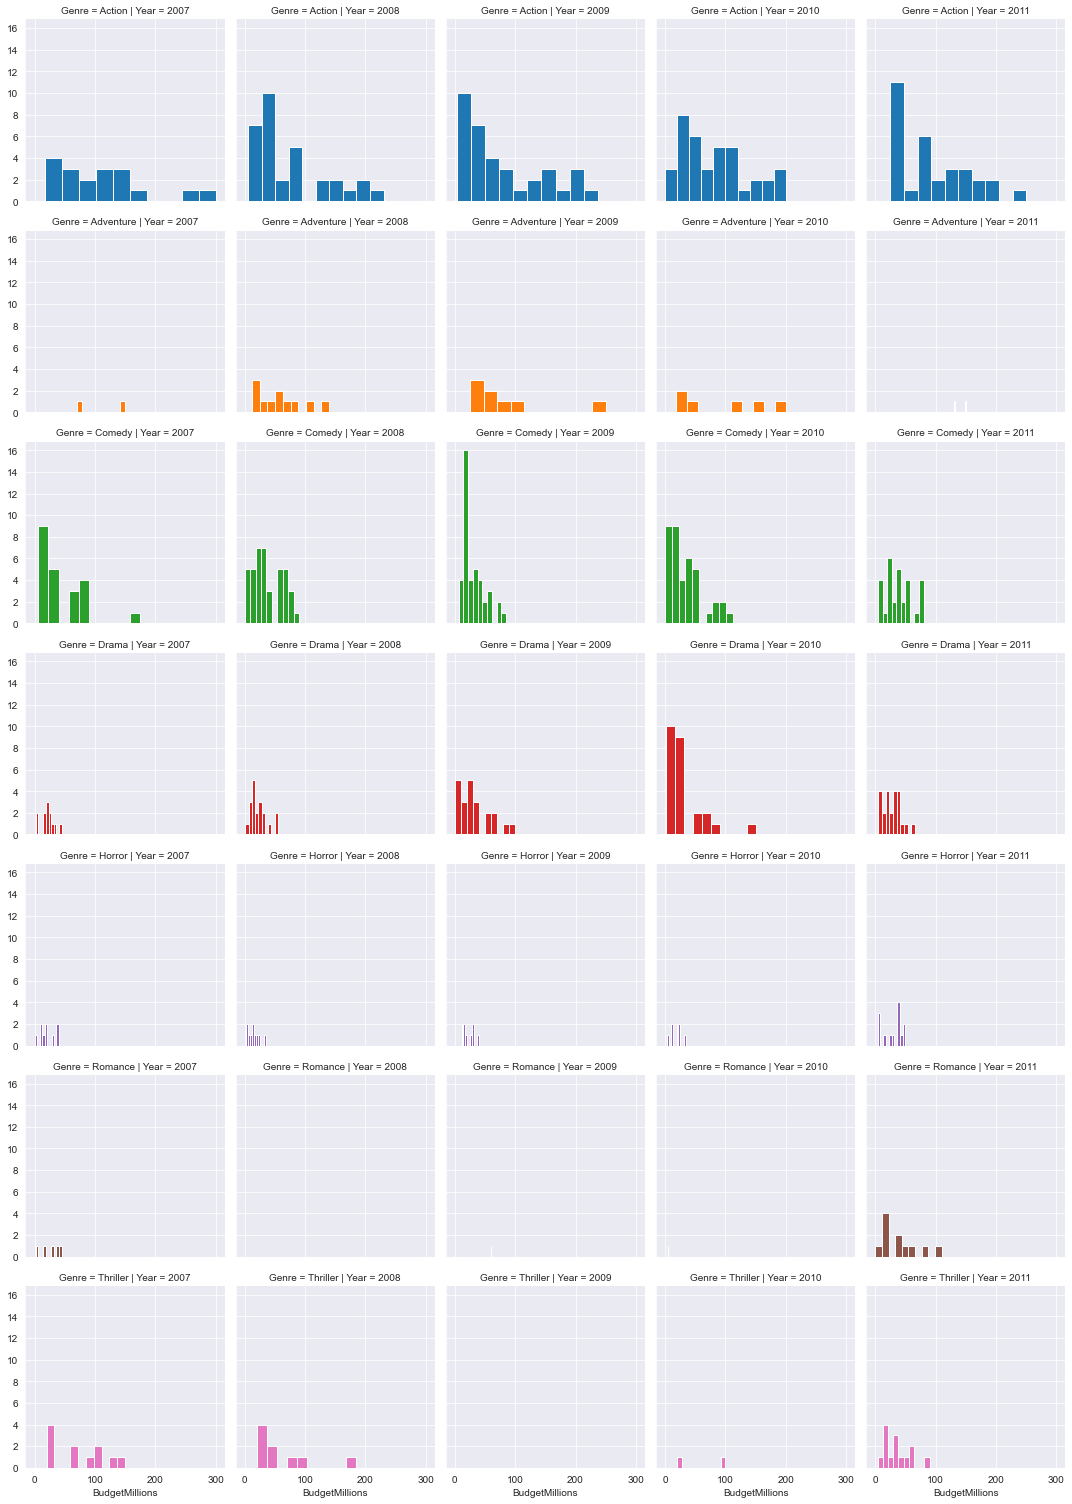

In [72]:
g = sns.FacetGrid(df, row='Genre', col='Year', hue='Genre')
g = g.map(plt.hist, 'BudgetMillions')

##### Genre & Year, show Critic & Audience Rating w/ diagonal

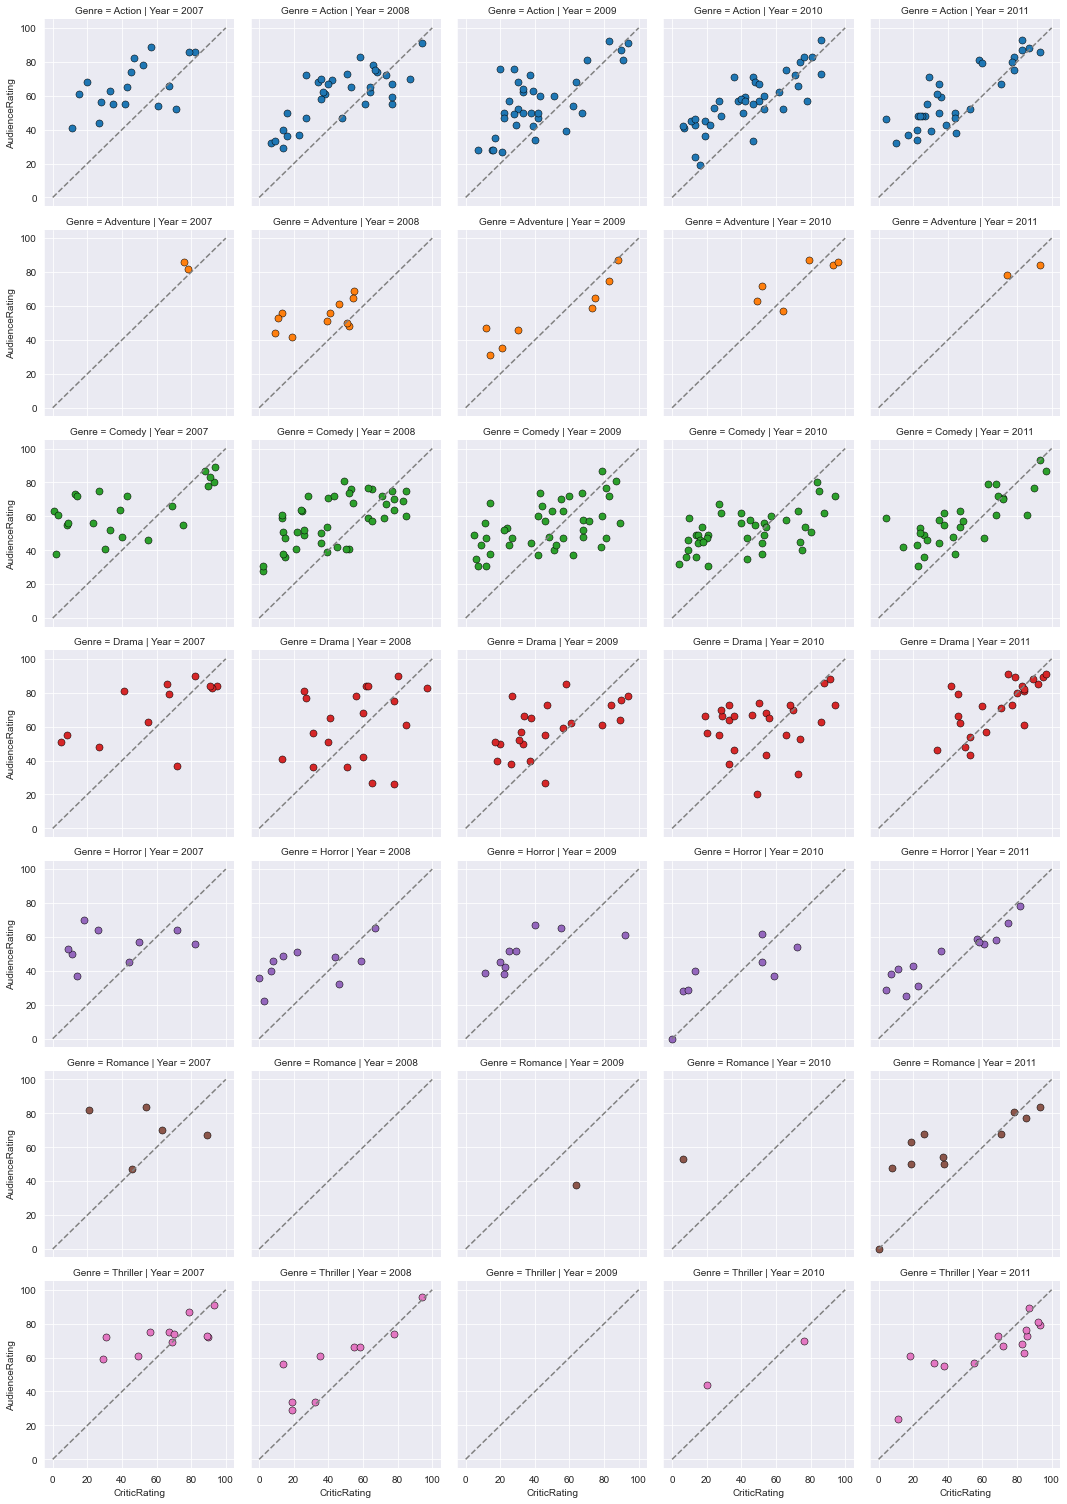

In [90]:
g = sns.FacetGrid(df, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c='gray', ls='--')



---

#### Building Dashboards

In [93]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

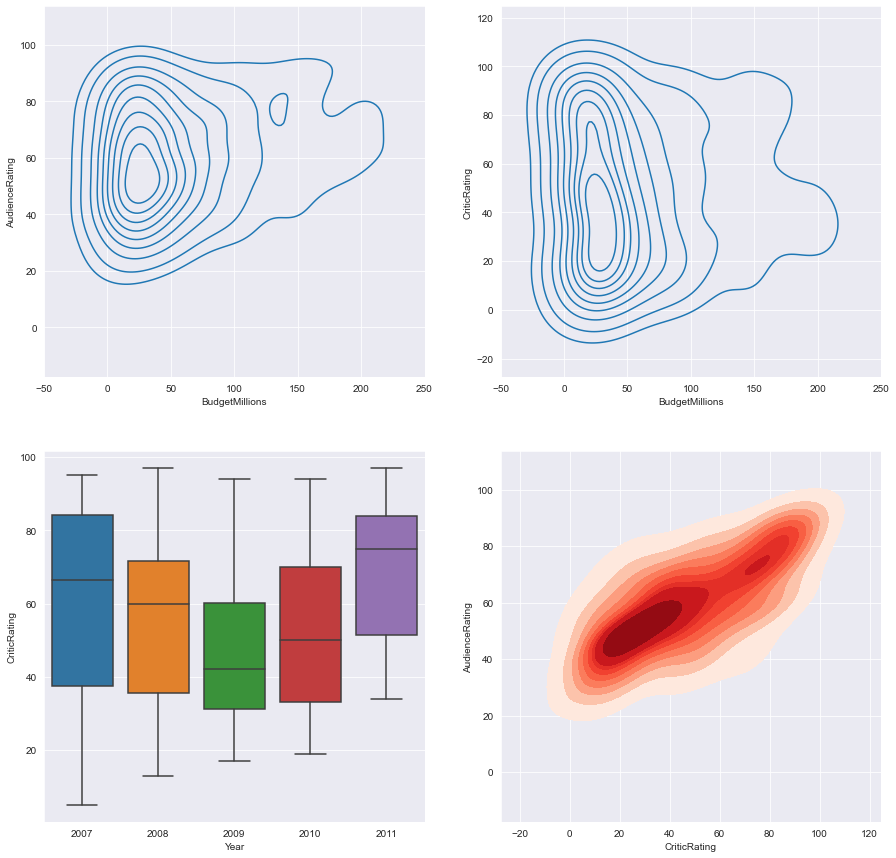

In [151]:
sns.set_style("darkgrid")
f, ax = plt.subplots(2, 2, figsize=(15,15))
k1 = sns.kdeplot(df.BudgetMillions, df.AudienceRating, \
                 ax=ax[0,0])
k2 = sns.kdeplot(df.BudgetMillions, df.CriticRating, \
                 ax=ax[0,1])
k3 = sns.boxplot(data=df[df.Genre == 'Drama'], x='Year', y='CriticRating', \
                 ax=ax[1,0])
k4 = sns.kdeplot(df.CriticRating, df.AudienceRating, shade = True, \
                 cmap='Reds', ax=ax[1,1])
####
k1.set(xlim=(-50,250))
k2.set(xlim=(-50,250))
plt.show()

---

# Dashboard Analysis of Critic Rating, Audience Rating, and Budget

In [104]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

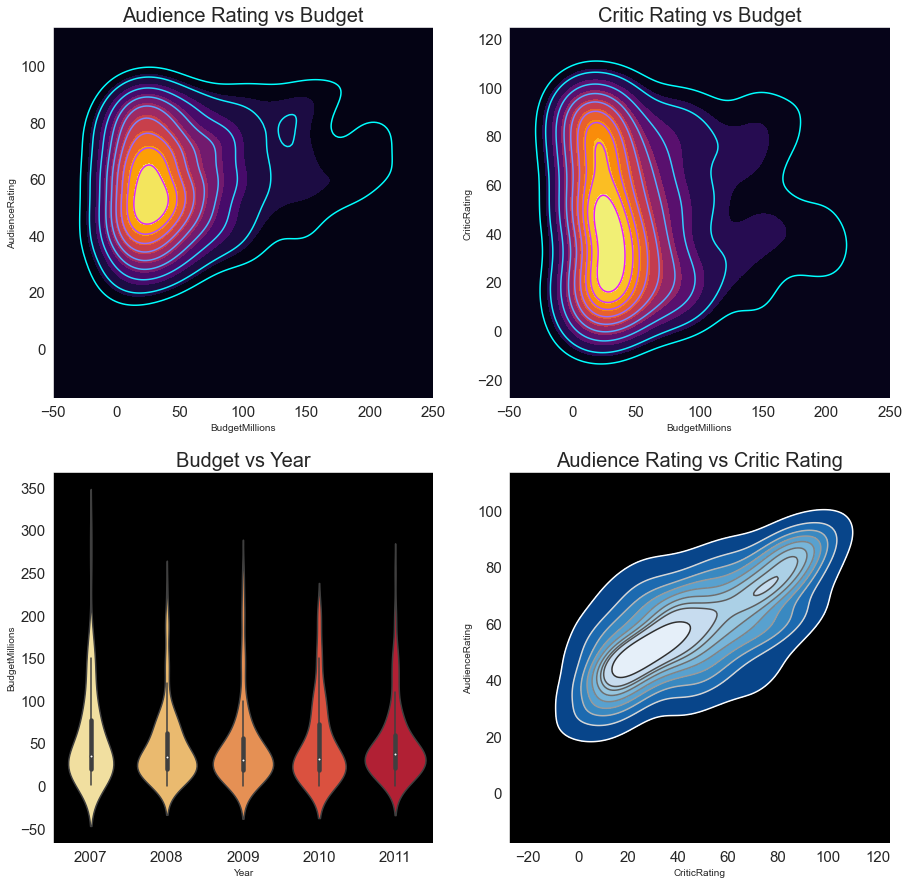

In [190]:
sns.set_style("dark", {"axes.facecolor": "black"})
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
f, ax = plt.subplots(2, 2, figsize=(15,15))
#Plot [0,0]
k1 = sns.kdeplot(df.BudgetMillions, df.AudienceRating, \
                 shade=True, shade_lowest=True, cmap='inferno', \
                 ax=ax[0,0])
k1b = sns.kdeplot(df.BudgetMillions, df.AudienceRating, \
                  cmap='cool', ax=ax[0,0])
ax[0,0].set_title("Audience Rating vs Budget", fontsize=20)

#Plot [0,1]
k2 = sns.kdeplot(df.BudgetMillions, df.CriticRating, \
                 shade = True, shade_lowest=True, cmap='inferno', \
                 ax=ax[0,1])
k2b = sns.kdeplot(df.BudgetMillions, df.CriticRating, \
                 cmap='cool', \
                 ax=ax[0,1])
ax[0,1].set_title("Critic Rating vs Budget", fontsize=20)
#Plot [1,0]
k3 = sns.violinplot(data=df,  \
                    x='Year', y='BudgetMillions', ax=ax[1,0], \
                    palette='YlOrRd')
ax[1,0].set_title("Budget vs Year", fontsize=20)

#Plot [1,1]
k4 = sns.kdeplot(df.CriticRating, df.AudienceRating, \
                 shade=True, shade_lowest=False, cmap='Blues_r', \
                 ax=ax[1,1])
k4b = sns.kdeplot(df.CriticRating, df.AudienceRating, \
                  cmap='gist_gray_r', ax=ax[1,1])
ax[1,1].set_title("Audience Rating vs Critic Rating", fontsize=20)
###############################
k1.set(xlim=(-50,250))
k2.set(xlim=(-50,250))
#test

plt.show()

In [122]:
#Thematic Edits

## DIstribution of Movie Budgets Grouped By Genre

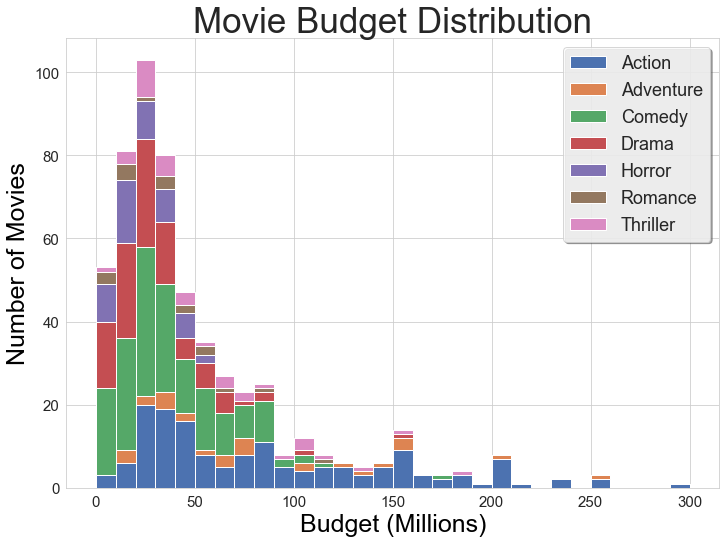

In [193]:
sns.set_style("whitegrid")
list1 = list()
mylabels = list()
for gen in df.Genre.cat.categories:
    list1.append(df[df.Genre == gen].BudgetMillions)
    mylabels.append(gen)
    
fig, ax = plt.subplots() #we convert it to a subplot with fig, which gives us more vis control
fig.set_size_inches(11.7, 8.27)
h = plt.hist(list1, bins=30, stacked=True, rwidth=1, label = mylabels)
plt.title("Movie Budget Distribution", fontsize=35)
plt.ylabel("Number of Movies", fontsize=25, color="Black")
plt.xlabel("Budget (Millions)", fontsize=25, color="Black")
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(frameon=True, fancybox=True, shadow=True, framealpha=0.8, \
           prop={'size':18})
plt.show()